# CMU Face Images Data Set 

# All Needed Libraries

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import glob
from sklearn.model_selection import train_test_split
import math

%matplotlib inline

# Load the Data Images to a Matrix

C:\Users\ahmed\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys


0


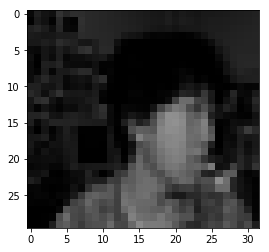

In [2]:
X_data = []
Y_data = []
files_pgm = glob.glob ("images/*.pgm")

# Reading each image from images folder
for myFile in files_pgm:
    image = np.array(ndimage.imread(myFile, mode = 'RGB'))
    X_data.append (image)
    if 'sunglasses' in myFile:
        Y_data.append(1)
    else:
        Y_data.append(0)

# split the data into training and testing
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_data, Y_data, test_size=0.3, random_state=21)

# convert from list into arrays
x_train = np.array(X_train_org)
x_test = np.array(X_test_org)
y_train = np.array(y_train_org)
y_test = np.array(y_test_org)


# 0 means (no sunglasses) and 1 means (sunglasses)

# Example of a picture
index = 0
print(Y_data[index])
#print(np.shape(X_data))
plt.imshow(X_data[index])


# Making sure that all matrix/vector dimensions straight

Number of training examples: m_train = 436
Number of testing examples: m_test = 188
train_set_x shape: (436, 30, 32, 3)
train_set_y shape: (436,)
test_set_x shape: (188, 30, 32, 3)
test_set_y shape: (188,)
1


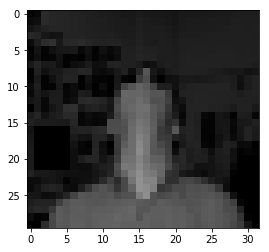

In [3]:
m_train = x_train.shape[0]
m_test = x_test.shape[0]

np.reshape(y_train, (m_train, 1))
np.reshape(y_test, (m_test, 1))

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

indTest = 4
plt.imshow(x_test[indTest])
print(y_test[indTest])

# Reshaping the Images into a one long Vector

In [4]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = x_train.reshape(x_train.shape[0], -1)
test_set_x_flatten = x_test.reshape(x_test.shape[0], -1)
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))

print(len(test_set_x_flatten[0]))
print(len(test_set_x_flatten))

train_set_x_flatten shape: (436, 2880)
train_set_y shape: (436,)
test_set_x_flatten shape: (188, 2880)
test_set_y shape: (188,)
2880
188


# EuclideanDistance to measure the distace 

In [5]:
def euclideanDistance(instance1, instance2):
    distance = np.power((np.array(instance1) - np.array(instance2)), 2)
    distance = np.sum(distance)
    return math.sqrt(distance)

euclideanDistance([4,3,0],[0,0,0])

5.0

In [6]:
import operator 

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x])
        distances.append((x, dist))
        
        
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    
    for x in range(k):
        neighbors.append(distances[x][0])
   
    
    
    return neighbors

result = getNeighbors(train_set_x_flatten , test_set_x_flatten[60], 3)
print(result)

#print(np.shape(test_set_x_flatten))

[375, 251, 249]


# Response or the prediction

In [7]:
def getResponse(neighbors):
    classVotes = {}
    
    for x in range(len(neighbors)):
        
        response = y_train[neighbors[x]]
        
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
            
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    #print(sortedVotes)
    return sortedVotes[0][0]

prediction = getResponse(result)
print(prediction)

1


# Accuracy

In [8]:
def getAccuracy(testSet, predictions):
    
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


# The Model

In [11]:

def main():
    
    #train_set_x_flatten shape: (436, 2880)
    #train_set_y shape: (436,)
    #test_set_x_flatten shape: (188, 2880)
    #test_set_y shape: (188,)

    # generate predictions
    predictions=[]
    k = 2
    
    for x in range(len(test_set_x_flatten)):
        
        neighbors = getNeighbors(train_set_x_flatten, test_set_x_flatten[x], k)     
        result = getResponse(neighbors)
        
        predictions.append(result)
    
        #print('> predicted=' + repr(result) + ', actual=' + repr(y_test[x]))
    
    accuracy = getAccuracy(y_test, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

In [12]:
main()

Accuracy: 81.38297872340425%
